In [19]:
# install important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

  

Load dataset

DATASET INFORMATION

id: Unique identifier for each entry (int64).

diagnosis: Diagnosis of the breast cancer (M = malignant, B = benign) (object).

radius_mean: Mean radius of the tumor (float64).

texture_mean: Mean texture of the tumor (float64).

perimeter_mean: Mean perimeter of the tumor (float64).

area_mean: Mean area of the tumor (float64).

smoothness_mean: Mean smoothness of the tumor (float64).

compactness_mean: Mean compactness of the tumor (float64).

concavity_mean: Mean concavity of the tumor (float64).

concave points_mean: Mean number of concave points of the tumor (float64).

symmetry_mean: Mean symmetry of the tumor (float64).

fractal_dimension_mean: Mean fractal dimension of the tumor (float64).

radius_se: Standard error of the radius (float64).

texture_se: Standard error of the texture (float64).

perimeter_se: Standard error of the perimeter (float64).

area_se: Standard error of the area (float64).

smoothness_se: Standard error of the smoothness (float64).

compactness_se: Standard error of the compactness (float64).

concavity_se: Standard error of the concavity (float64).

concave points_se: Standard error of the number of concave points (float64).

symmetry_se: Standard error of the symmetry (float64).

fractal_dimension_se: Standard error of the fractal dimension (float64).

radius_worst: Worst (largest) radius (float64).

texture_worst: Worst texture (float64).

perimeter_worst: Worst perimeter (float64).

area_worst: Worst area (float64).

smoothness_worst: Worst smoothness (float64).

compactness_worst: Worst compactness (float64).

concavity_worst: Worst concavity (float64).

concave points_worst: Worst number of concave points (float64).

symmetry_worst: Worst symmetry (float64).

fractal_dimension_worst: Worst fractal dimension (float64).

In [20]:
# Load the dataset
df = pd.read_csv('/Users/chibu/Documents/Lambton DSMM/Term 3 courses/05. AML 3104-Ishant/BreastCancer-assign02/breast-cancer.csv')

# Display the first few rows of the dataset
print(df.head())



         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0    842302         M        17.99         10.38          122.80     1001.0  \
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0          0.11840           0.27760          0.3001              0.14710  \
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [21]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean   
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000  \
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
count       569.000000        569.000000      569.000000           569.000000  \
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst   
count     569.000000  ...    569.000000     569.000000       569.000000  \
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst   
count   569.000000        569.000000         569.000000       569.000000  \
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [22]:
df.isnull().sum() # checl for null values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

VISUALIZATION

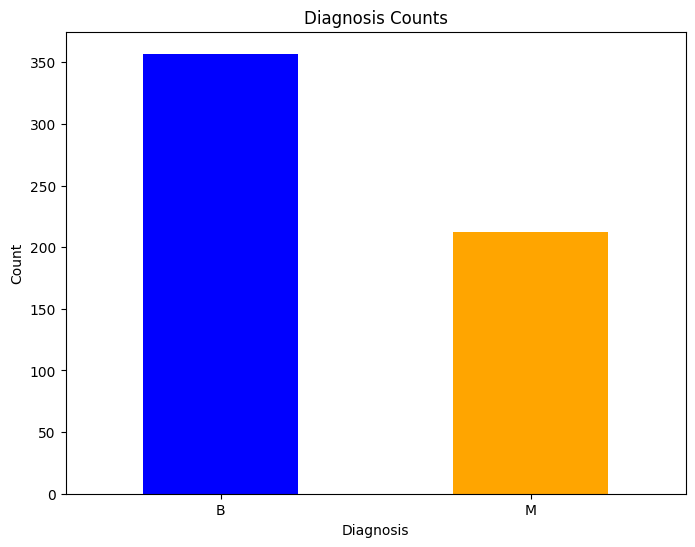

In [23]:
# Count the occurrences of malignant and benign diagnoses
diagnosis_counts = df['diagnosis'].value_counts()

# Plot the diagnosis counts
plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Diagnosis Counts')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Noticed that features have repeatitive column name with mean, standard error and worst as difference, thereofre in the PairPlots, we will visualize the each group to show the relationship

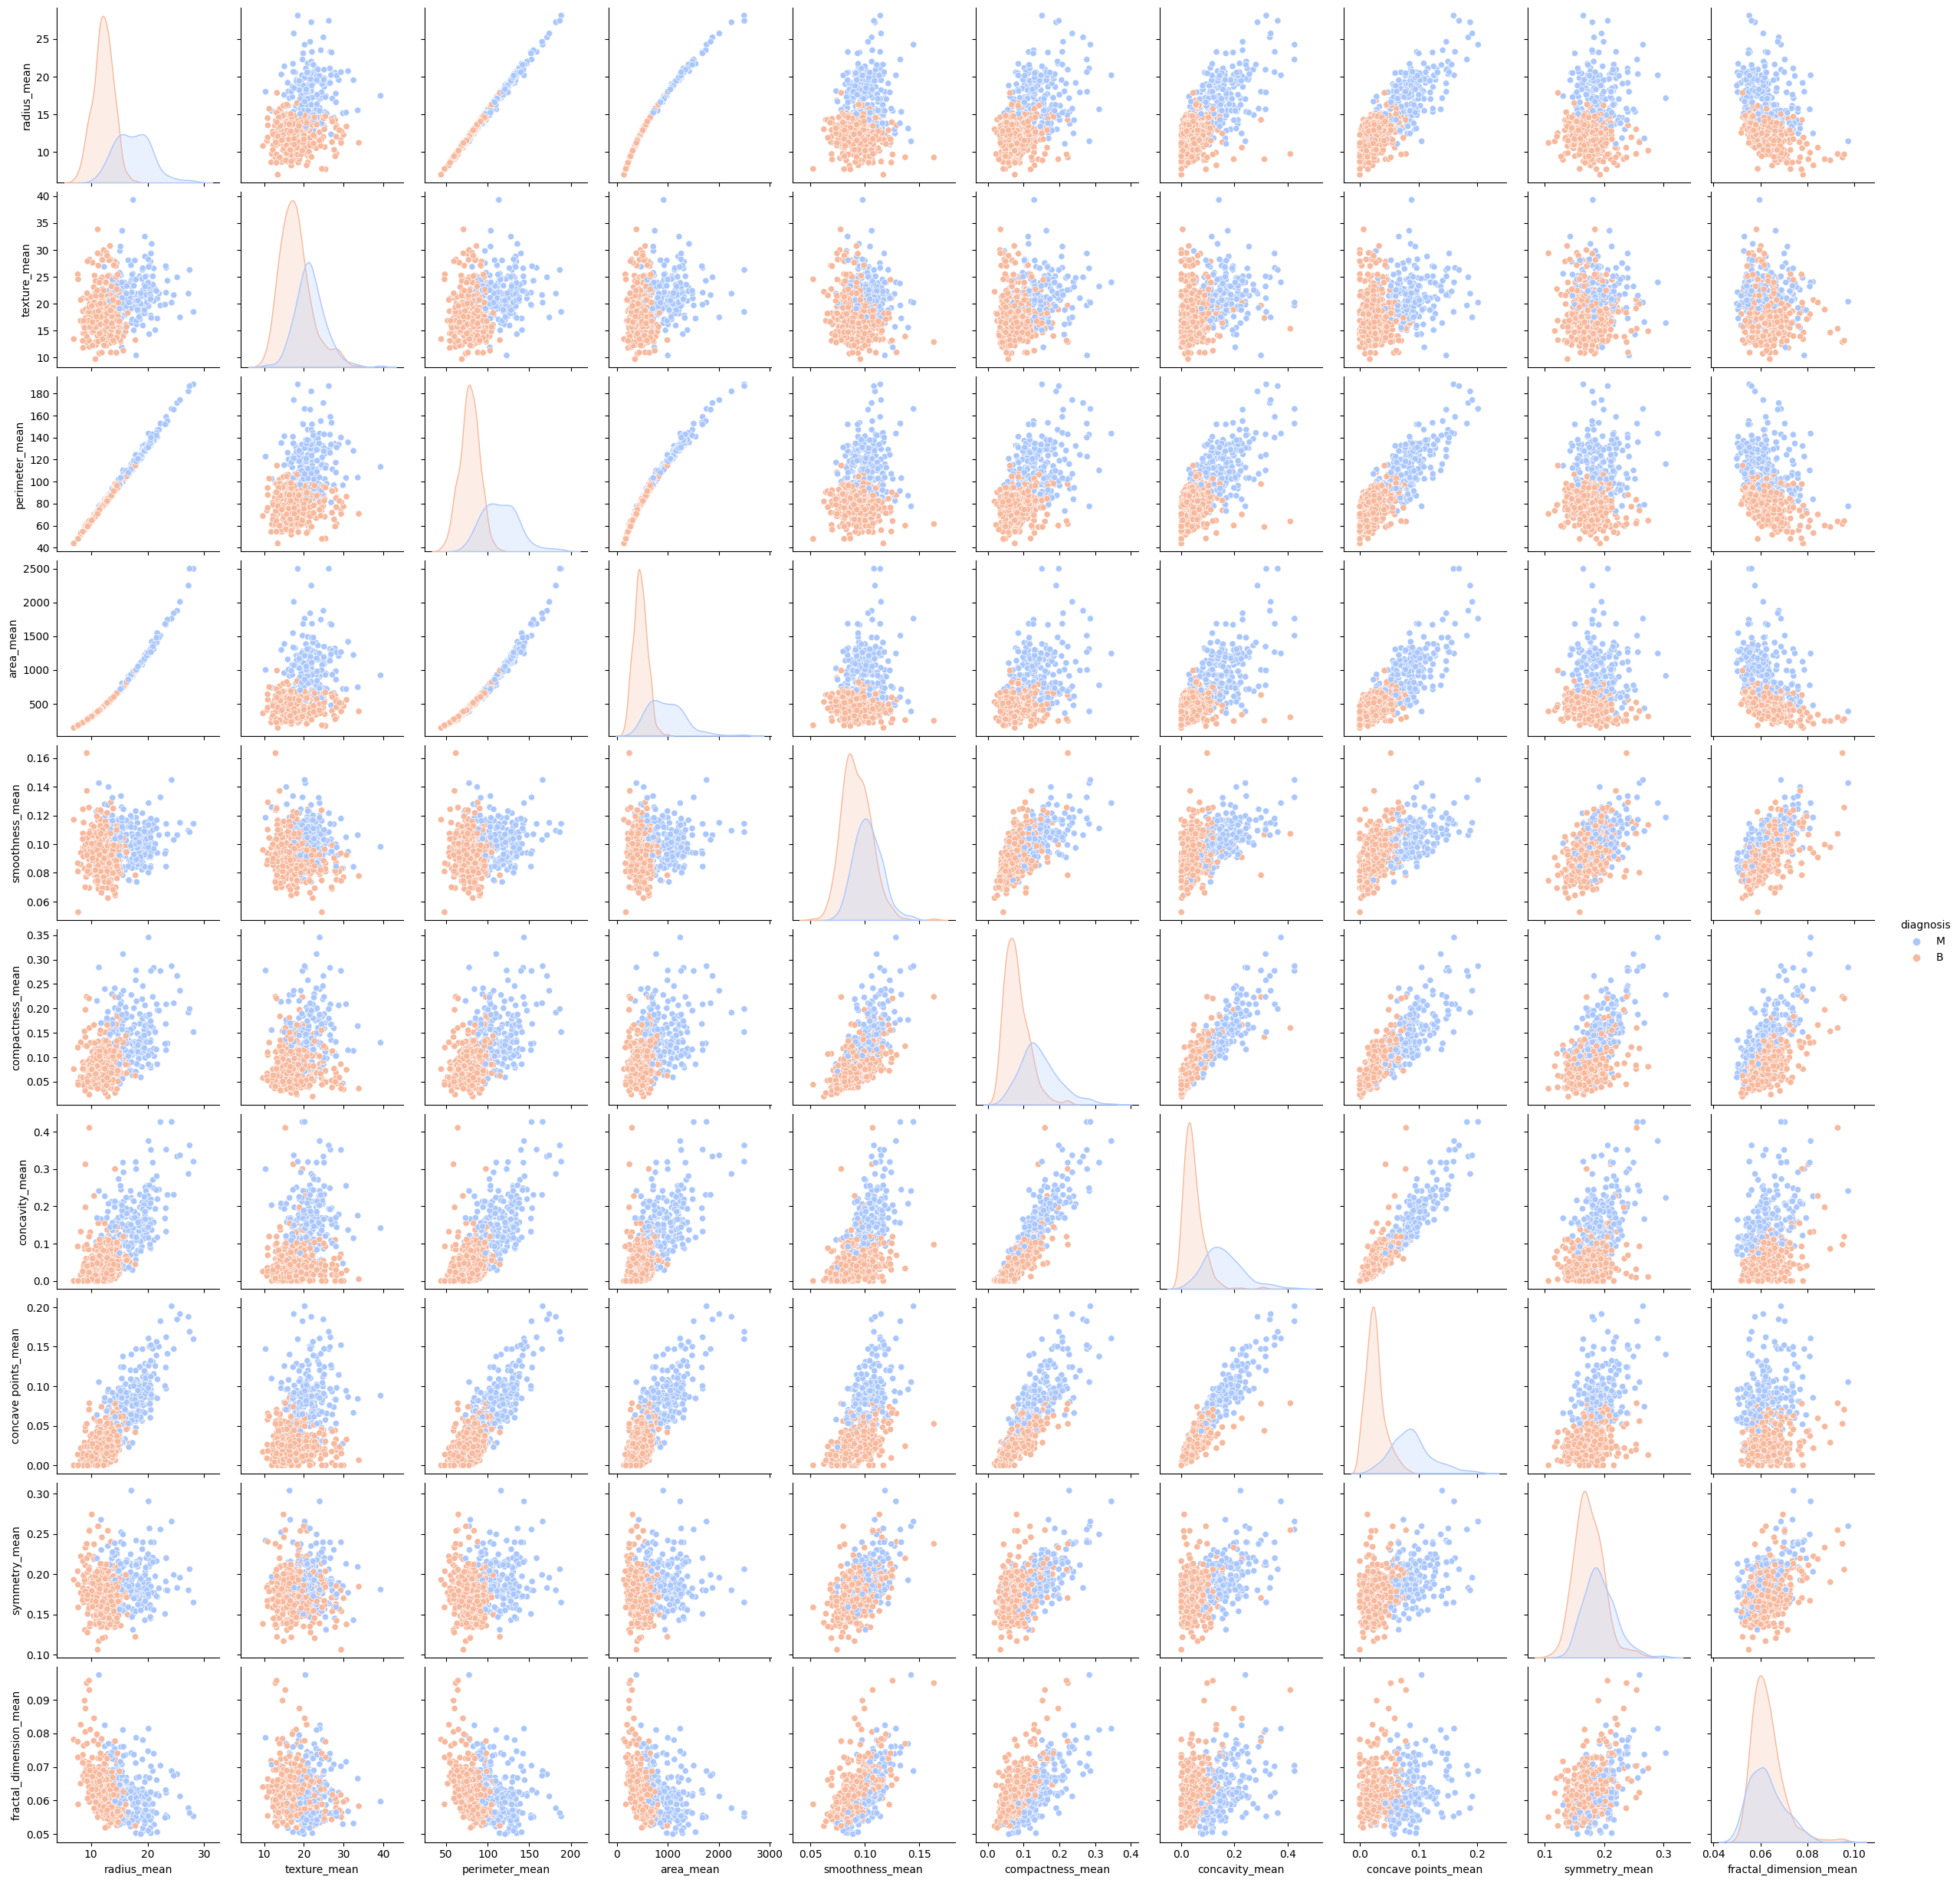

In [8]:
# Pairplot for selected features related to tumor
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', palette='coolwarm')
plt.show()

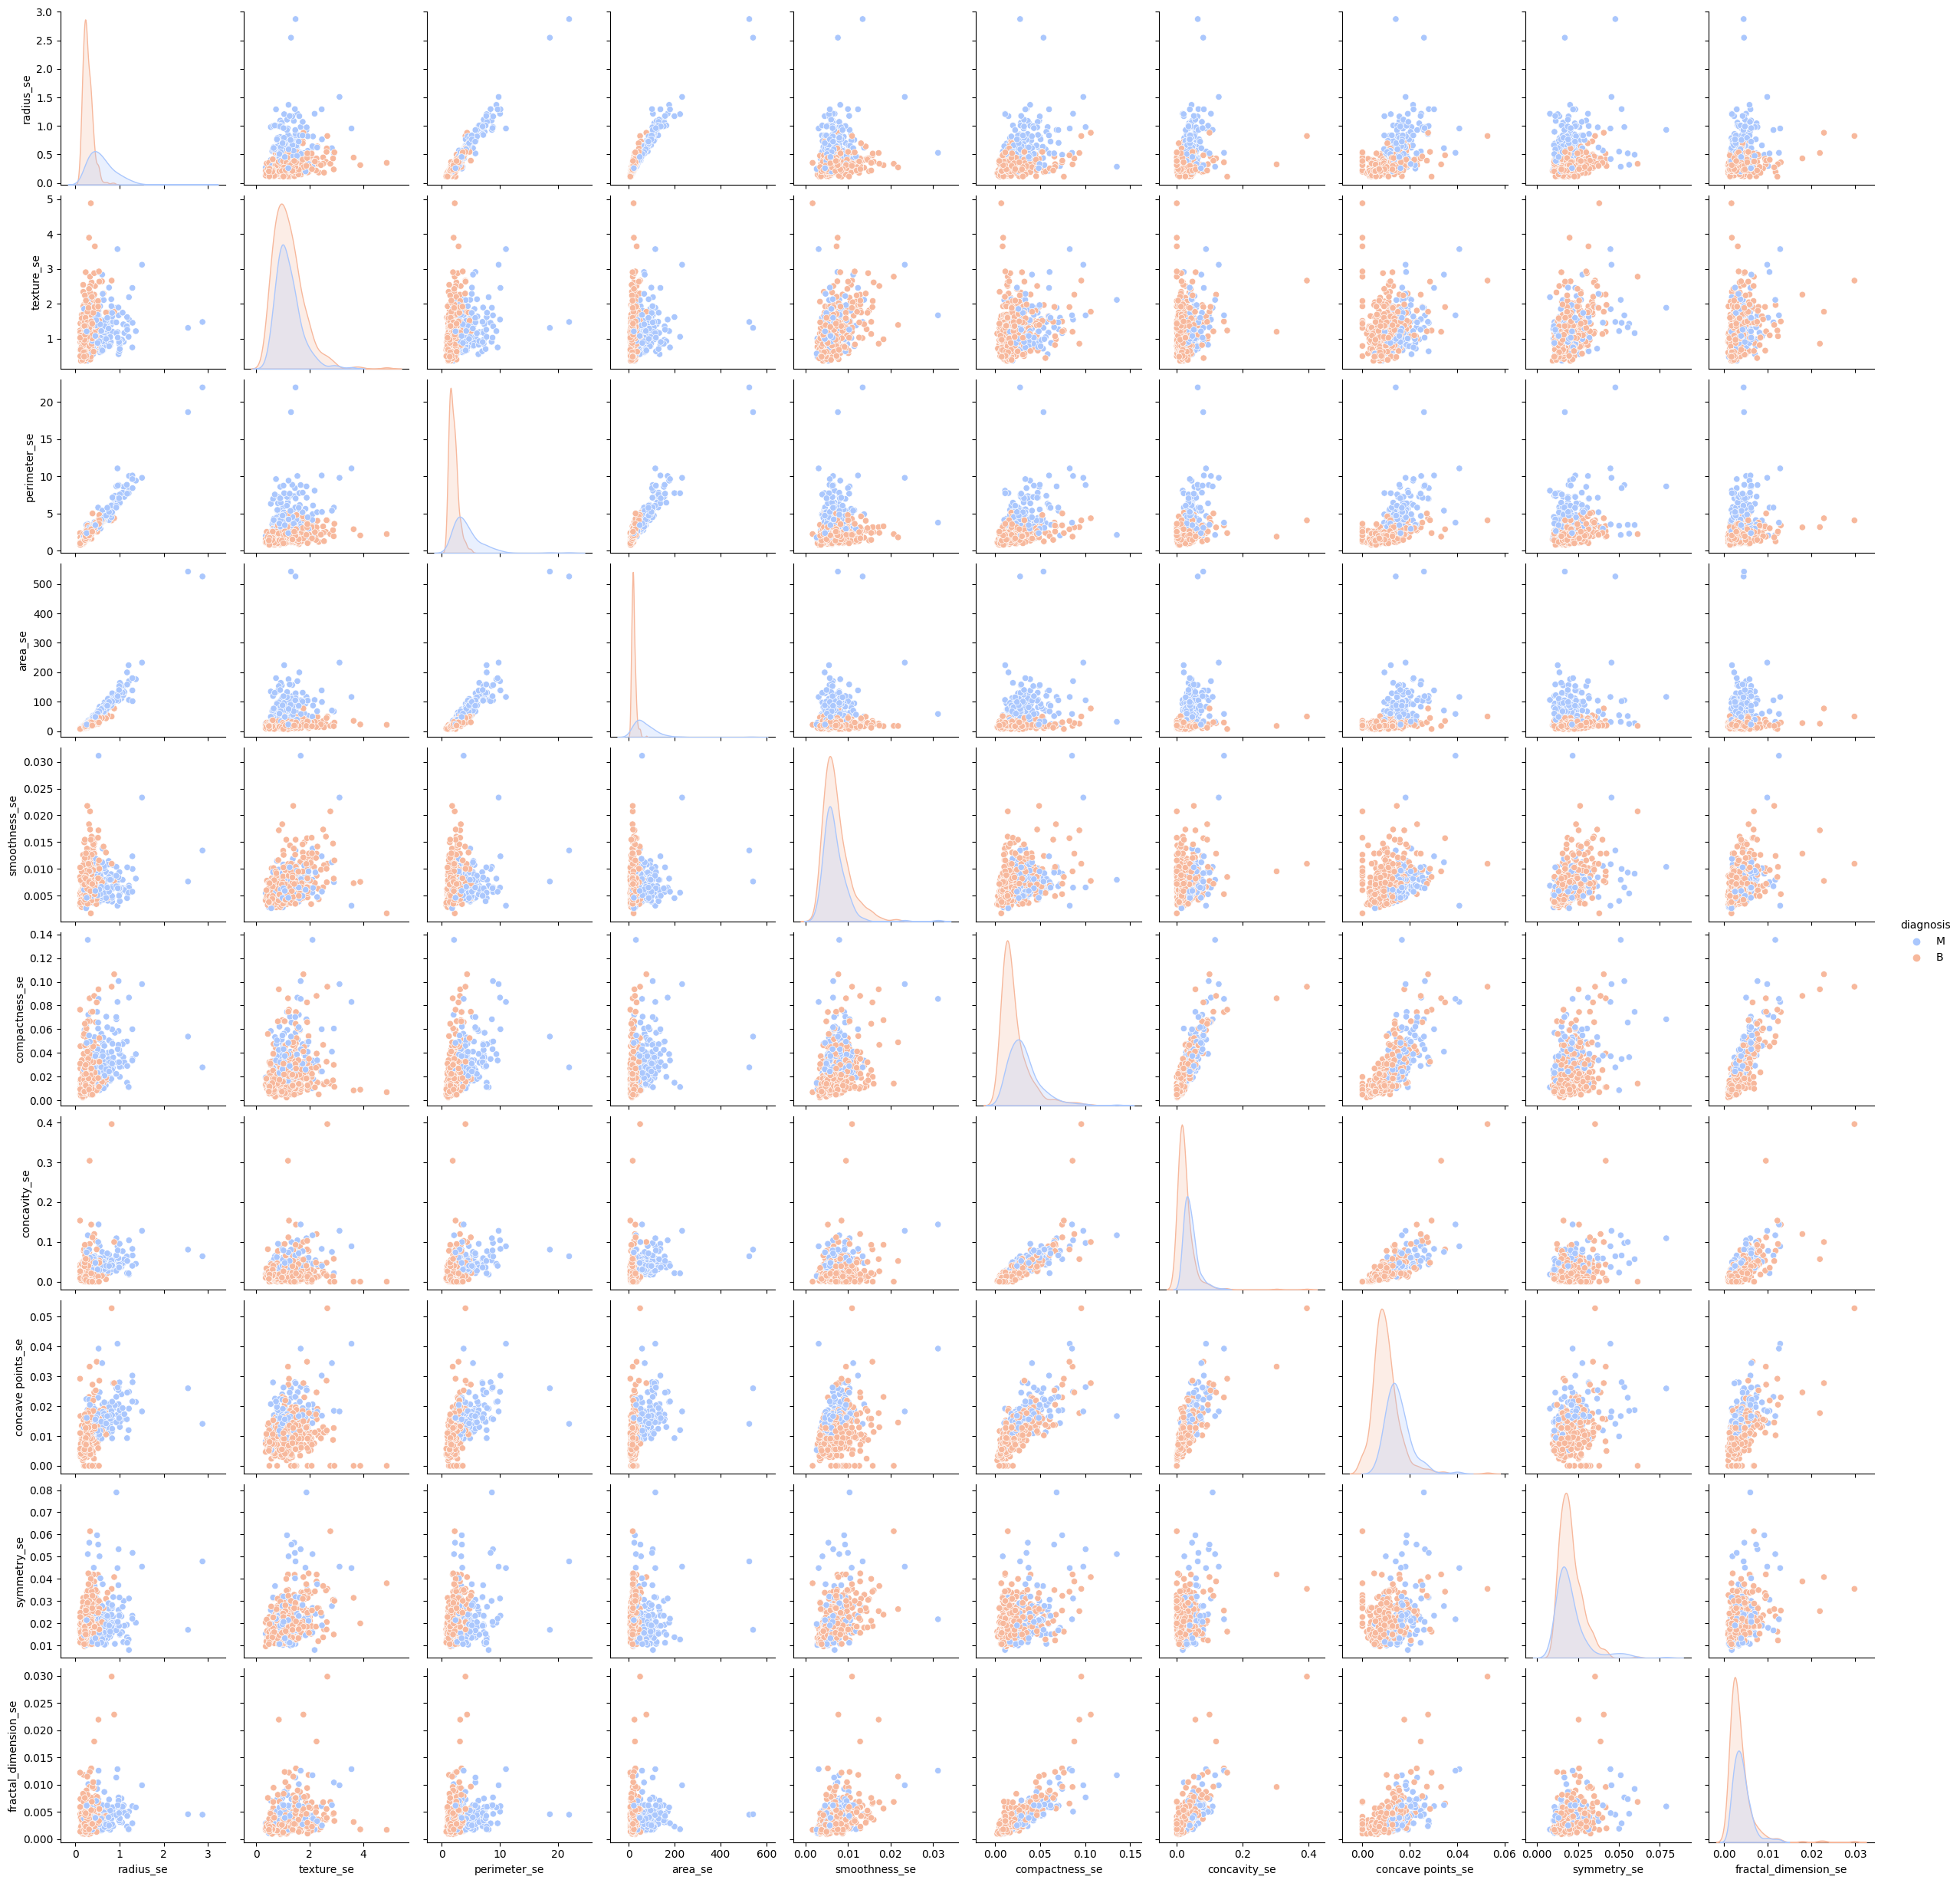

In [10]:
# Pairplot for selected features related to tumor standard error
selected_features = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', palette='coolwarm')
plt.show()

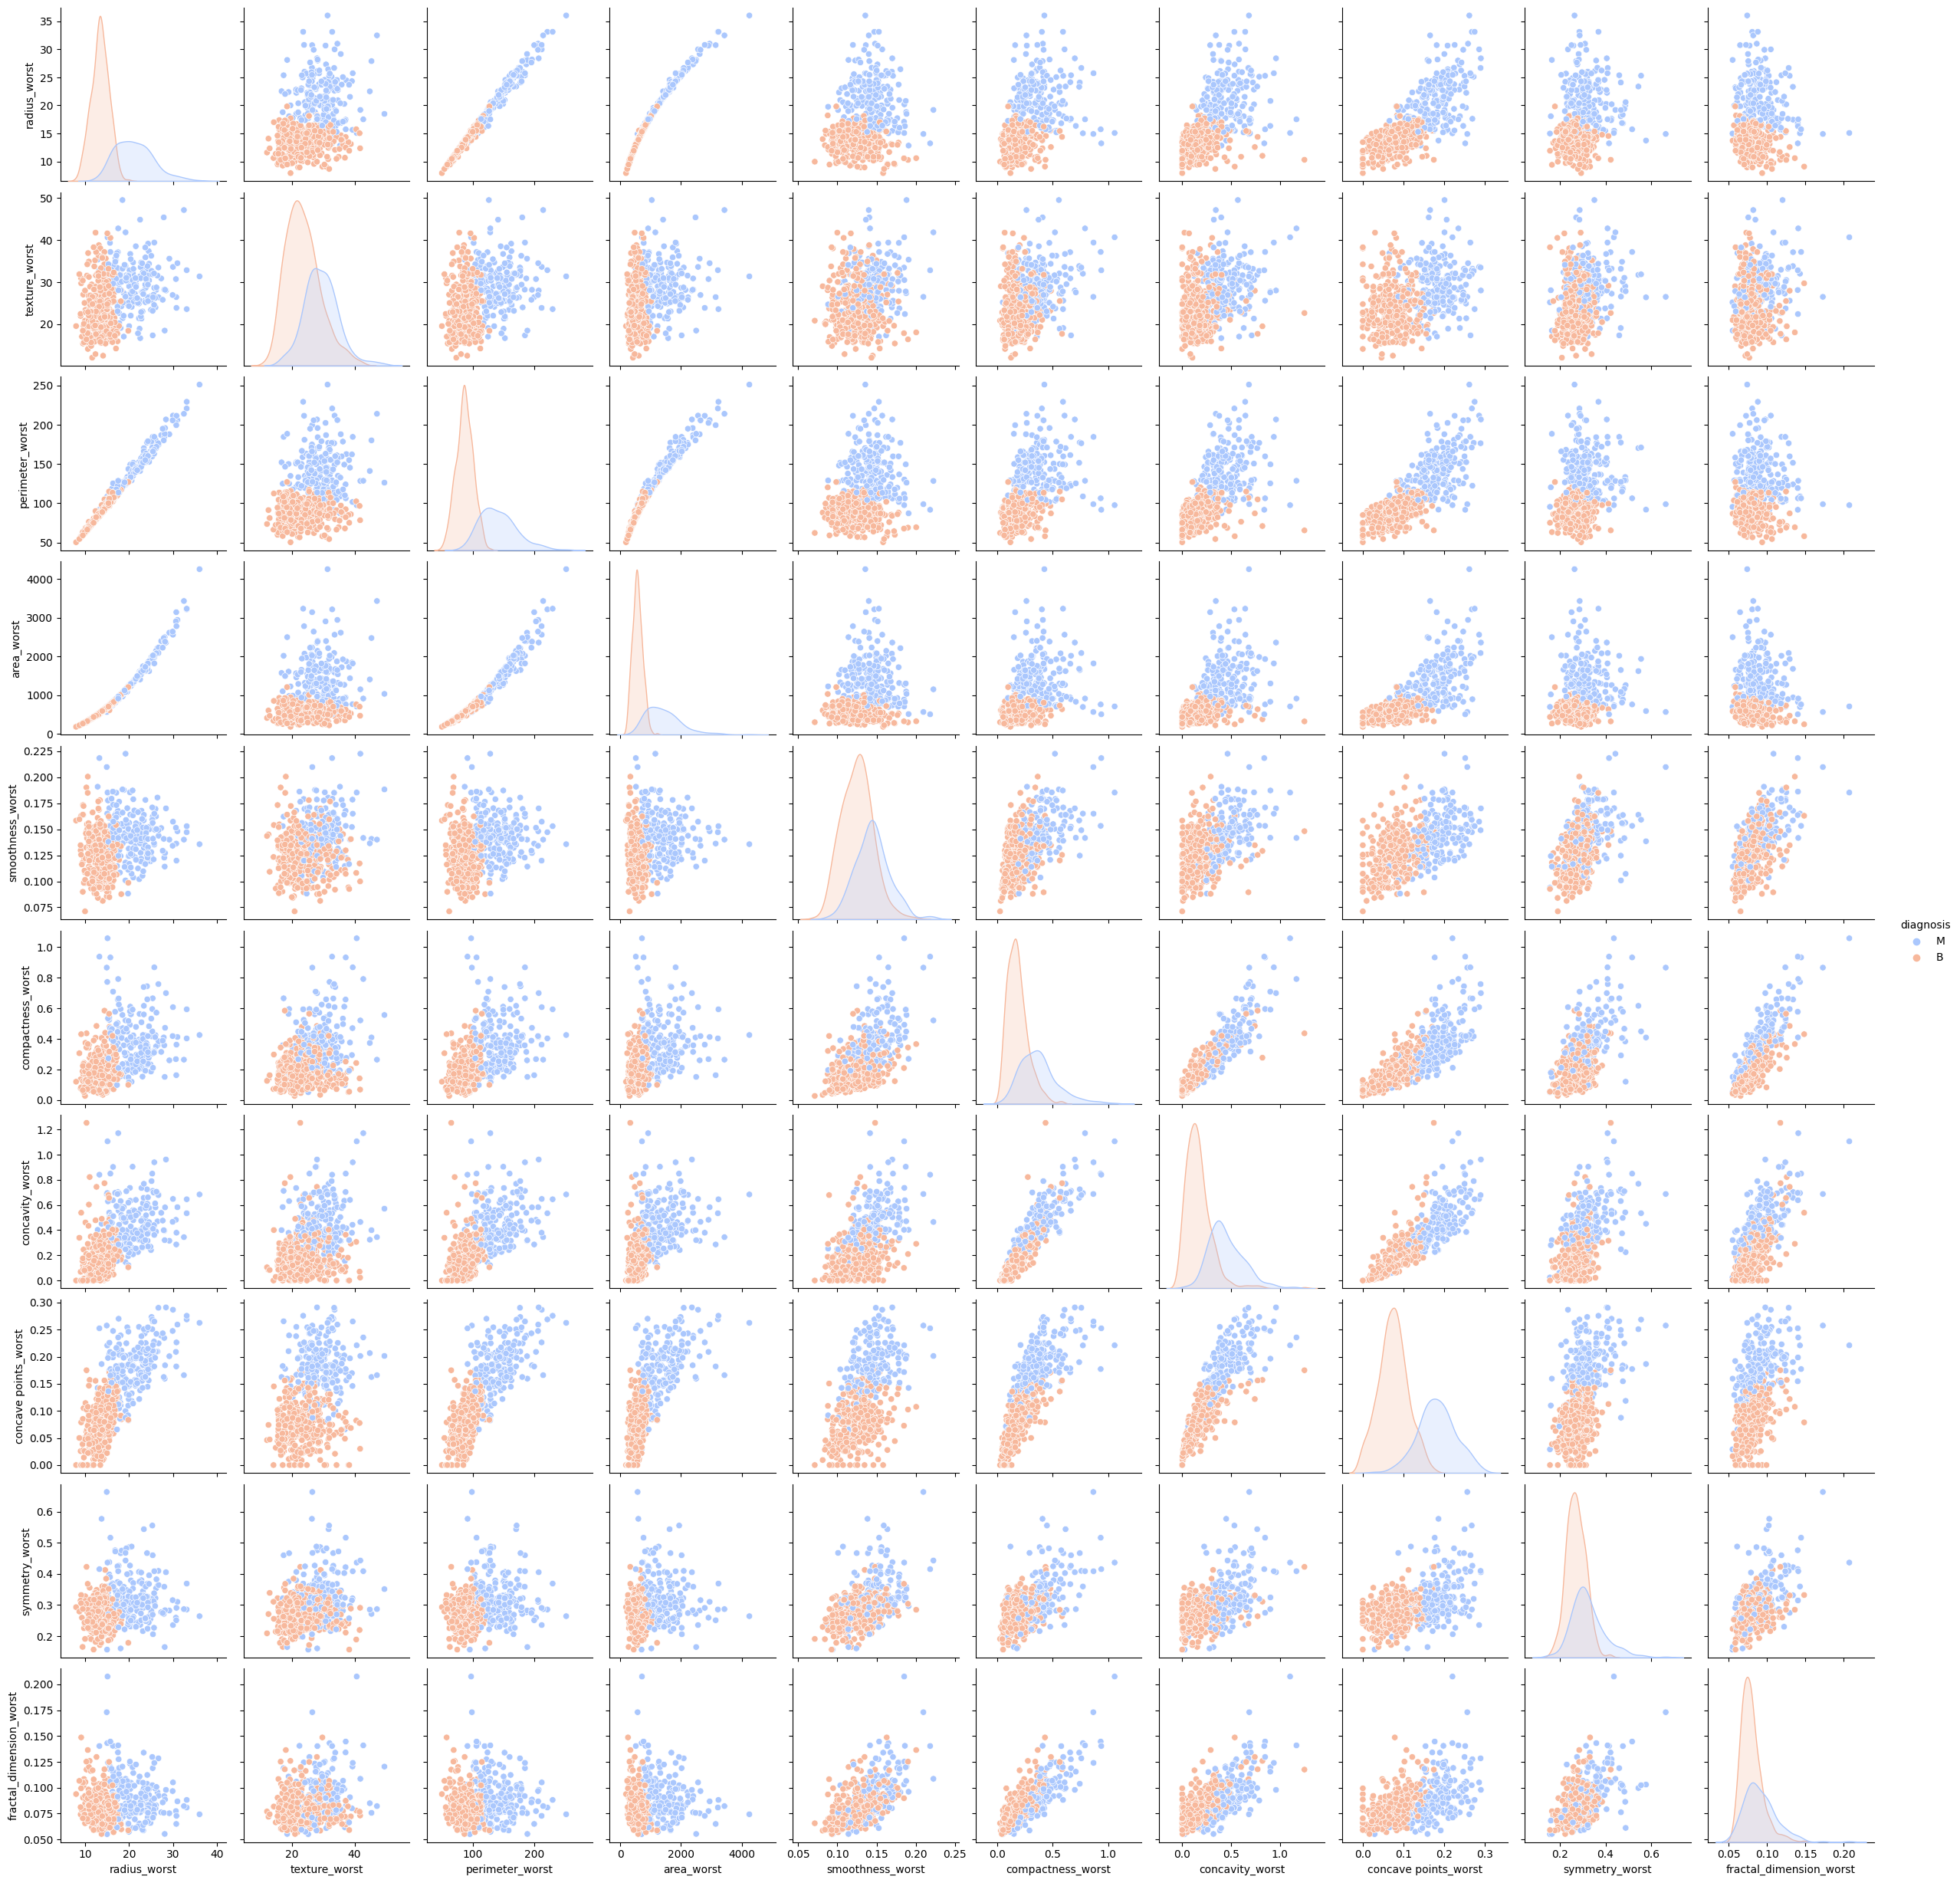

In [11]:
# Pairplot for selected features related to tumor worst
selected_features = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', palette='coolwarm')
plt.show()

In [24]:
# Drop the id column which is not necessary

df = df.drop('id', axis=1)

In [25]:
## Encode categorical Diagnosis feature into 0 & 1 
label_encoder_diagnosis=LabelEncoder()
df['diagnosis']=label_encoder_diagnosis.fit_transform(df['diagnosis'])
df
# Preprocessed data is saved for further analysis
df.to_csv('preprocessed_breast_cancer.csv', index=False)

In [26]:
# Set diagnosis as target
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




DATASET STANDARDIZATION

In [27]:
# Scale the features into same range
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [28]:
pickle.dump(scaler,open('scaler.pkl','wb' )) # save the scaled as a pickle file

FEATURE SELECTION


In [29]:
# Use the SelectBest to choose the necessary features
def select_features(X_train, y_train, X_test, k=10):
    fs = SelectKBest(score_func=f_classif, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Assuming the preprocessed data is saved in variables X_train, y_train, X_test
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)



In [37]:
X_train_fs

array([[-1.44075296, -1.36208497, -1.1391179 , ..., -0.97396758,
         4.67282796,  0.9320124 ],
       [ 1.97409619,  2.09167167,  1.85197292, ...,  2.1374055 ,
         1.92862053,  2.6989469 ],
       [-1.39998202, -1.34520926, -1.10978518, ..., -0.99971493,
        -0.64491059, -0.97023893],
       ...,
       [ 0.04880192, -0.06512547, -0.06142266, ..., -0.33927781,
        -1.12796759, -1.23903365],
       [-0.03896885, -0.03137406, -0.15477966, ..., -0.01355621,
         0.63253231,  1.05001236],
       [-0.54860557, -0.60350155, -0.5518995 , ..., -0.58052694,
        -0.76538799, -0.61102866]])

In [30]:
# Save the feature selector
with open('feature_selector.pkl', 'wb') as f:
    pickle.dump(fs, f)


In [31]:
# Save the selected features data
with open('selected_features_data.pkl', 'wb') as f:
    pickle.dump((X_train_fs, X_test_fs, y_train, y_test), f)

MODEL BUIULDING 

In [32]:
# grid_search_cv.py
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

def grid_search_cv(X_train, y_train):
    parameter_space = {
        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive'],
    }

    mlp = MLPClassifier(max_iter=100)
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
    clf.fit(X_train, y_train)

    print('Best parameters found:\n', clf.best_params_)
    return clf


# load selected features data is saved in variables X_train_fs, y_train
with open('selected_features_data.pkl', 'rb') as f:
    X_train_fs, X_test_fs, y_train, y_test = pickle.load(f)
clf = grid_search_cv(X_train_fs, y_train)
#saved the trained model

# clf is trained MLPClassifier model
import joblib
from sklearn.neural_network import MLPClassifier

joblib.dump(clf, 'clf_model.pkl')

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


c:\Program Files\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


['clf_model.pkl']

MODEL EVALUATION

Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



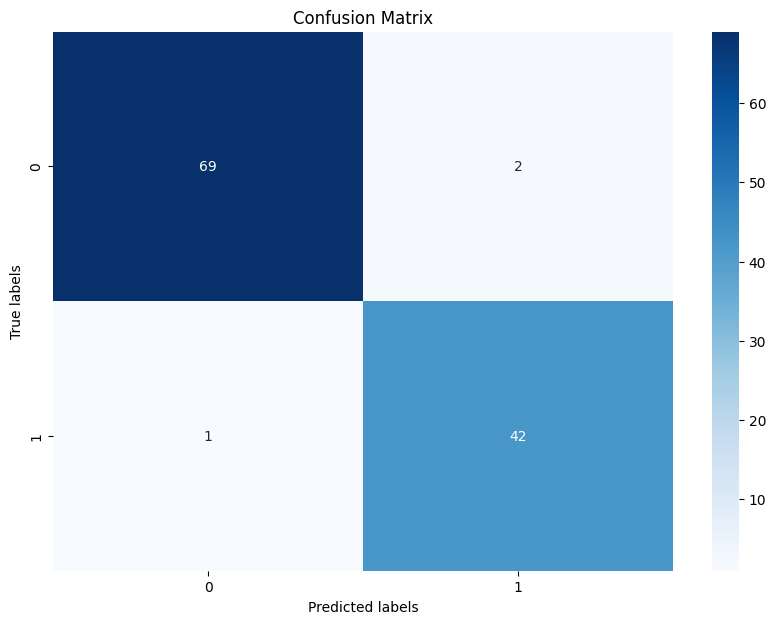

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def train_evaluate_ann(X_train_fs, y_train, X_test_fs, y_test, clf):
    y_pred = clf.predict(X_test_fs)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming the grid search CV model is saved in variable clf
train_evaluate_ann(X_train_fs, y_train, X_test_fs, y_test, clf)